# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/human_body_temperature.csv')

In [101]:
# define functions for bootstrapping

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [31]:
# Your work here.
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [5]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


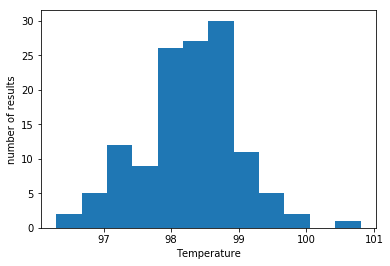

In [19]:
#plot a histogram of temperatures in the sample

plt.hist(df.temperature, bins = 12)
plt.xlabel('Temperature')
plt.ylabel('number of results')
plt.show()

C:\Conda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


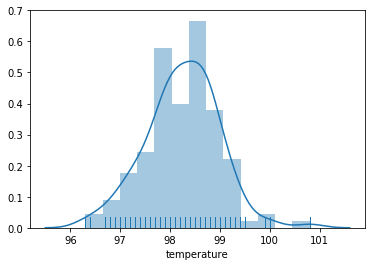

In [22]:
# draw a distribution plaot of the data set

import seaborn as sns
sns.distplot(df.temperature, kde = True, rug = True)

Q1:

These 2 graphical representations show a relatively normal distribution, but also shows some skewness.  The graphical example alone is probably not enough to determine normalcy.  Other methods can be applied as well.


In [23]:
from scipy import stats

stats.normaltest(df.temperature)

NormaltestResult(statistic=2.703801433319203, pvalue=0.2587479863488254)

This tests the null hypothesis that the sample comes from a normal distribution. Since the p-value of .25 is well above the standard convention of  alpha =.05, we can not rule out that the sample came from a normal distribution.

Q2: Is the sample size large? Are the observations independent?

The sample size of 130 is definitely a small one, but is also above 30, so we can expect the distribution to appear normal if it is, in fact, normal.  The observations do seem to be independent.

In [111]:
# scikit-learn bootstrap
from sklearn.utils import resample

# Bootstrap hypothesis - true population mean temperature is 98.6

#shift our data to fit null hypothesis - that the mean of the 2 samples is the same

temp_shifted = df.temperature - np.mean(df.temperature) + 98.6
temp_shifted.head()


0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64

In [51]:
# find the difference between observed sample, and null hypothesis of 98.6

diff_obs= np.mean(df.temperature) - 98.6
diff_obs

-0.35076923076921673

In [107]:
# create bootstrap sample with shifted data

boot = draw_bs_reps(temp_shifted, np.mean, 10000)

# print  the min, just to see if the observed value falls inside of it
print(boot.min())

98.35076923076922


In [109]:
p_value = np.sum((boot - 98.6) <= diff_obs)/10000
confidence_interval = np.percentile(boot, [2.5, 97.5])
print('P-Value:  {:6f}'.format(p_value))
print("95% Confidence Interval: ", confidence_interval)


P-Value:  0.000000
95% Confidence Interval:  [98.47382692 98.72384615]


The p-value of 0.0 doesn't eliminate the possibility of 98.6 being the mean temp, but it does show that it did not happen in 10,000 trials.  Based on this it seems rather unlikely that 98.6 is the true mean.  It is also is noteable that the established mean is well outside the confidence interval of the shifted data.

For frequentist testing, a one sample test would be appropriate, since the data is being compared to a single number as opposed to a new group of data.

In [60]:
import scipy

# T-test
t_stats = scipy.stats.ttest_1samp(df.temperature, 98.6)
print ('Original t-score:', t_stats)


Original t-score: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


In [66]:
z_score = (np.mean(df.temperature)- 98.6)/np.std(df.temperature)
print('Z-score: ', z_score)

Z-score:  -0.48027041116080765


The very small p-value allows the null hypothesis, that the samples have the same mean, to be ruled out.

In [105]:
small_sample = draw_bs_reps(temp_shifted, np.mean, 10)
small_t = scipy.stats.ttest_1samp(small_sample, 98.6)
small_z = (np.mean(small_sample)- 98.6)/np.std(small_sample)
print ('Small sample t-score:', small_t)
print('Z-score: ', small_z)

Small sample t-score: Ttest_1sampResult(statistic=1.3258749473343743, pvalue=0.2175453614429792)
Z-score:  0.4419583157781248


T-score is generally accepted to better for small samples.  The p-value of .21 provided by the small sample would not be sufficient to rule out the null hypothesis, which shows some of the issues of working with too small a sample.

In [82]:
# break data into male and female

df_f = df[df.gender == 'F']
df_m = df[df.gender == 'M']
diff = np.mean(df_f.temperature) - np.mean(df_m.temperature)
print('Female Average Temp: ', df_f.temperature.mean())
print('Male Average Temp: ', df_m.temperature.mean())
print('Difference in Avg Temp: ', diff)

Female Average Temp:  98.39384615384613
Male Average Temp:  98.1046153846154
Difference in Avg Temp:  0.289230769230727


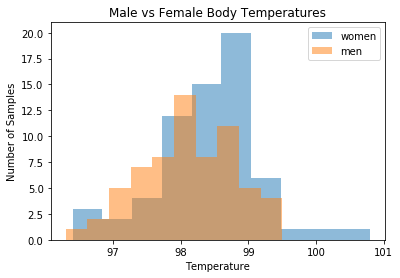

In [79]:
plt.hist(df_f.temperature, 10, alpha=0.5, label='women')
plt.hist(df_m.temperature, 10, alpha=0.5, label='men')
plt.xlabel('Temperature')
plt.ylabel('Number of Samples')
plt.title('Male vs Female Body Temperatures')
plt.legend(loc='upper right')
plt.show()

In [92]:
# Bootstrap null hypothesis - true population mean temperature is not 98.6

#shift our data to fit null hypothesis
# make the female temps fit the male temp mean

f_temp_shifted = df_f.temperature - np.mean(df_f.temperature) + np.mean(df_m.temperature)

# create bootstrap sample with shifted data

f_boot = resample(f_temp_shifted, replace = True, n_samples = 10000, random_state = 1)

#compute p_value and confidence interval

new_p_value = np.sum((f_boot - np.mean(df_m.temperature)) >= diff)/10000
new_confidence_interval = np.percentile(f_boot, [2.5, 97.5])
print("P-Value: ", new_p_value)
print("95% Confidence Interval: ", new_confidence_interval)


P-Value:  0.3809
95% Confidence Interval:  [96.41076923 99.71076923]


A p-value of .38 shows a good chance that these samples could actually have come from populations that had the same mean.  If nothing else we can not rule out the null hypothesis that they did.

In [93]:
# calculate mean, 95% confidence interval, margin of error


print ('Original Mean:', np.mean(df['temperature']))
print ('95% Confidence Interval:', np.percentile(df['temperature'], [2.5, 97.5]))
print ('Margin of Error:', 1.96 * np.std(df['temperature'])/ np.sqrt(130))

Original Mean: 98.24923076923078
95% Confidence Interval: [96.7225 99.4775]
Margin of Error: 0.125550964802579


In [97]:
#t statistic and p value for difference between male and female temps

difference =scipy.stats.ttest_ind(df_m['temperature'],df_f['temperature'])
print(difference)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)


The t-test here shows a p-value below our α of 0.05 so the null hypotheses that both data sets could have the same mean is rejected.